Import all necessary modules here:

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor  
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

Understand the data:

In [85]:
df = pd.read_csv("feeData.csv")
df.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [86]:
df.columns

Index(['Year', 'State', 'Type', 'Length', 'Expense', 'Value'], dtype='object')

In [87]:
df = df.dropna()

In [88]:
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


There are no Continous values that can be used!

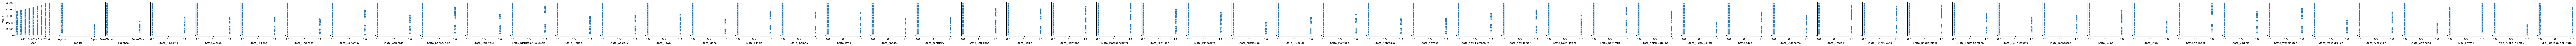

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df):
    
    X = df[['Year', 'State', 'Type', 'Length', 'Expense']]
    y = df['Value']

    # Convert categorical features to numerical
    X = pd.get_dummies(X, columns=['State', 'Type'])

    # Plot pairwise relationships between input features and target feature
    sns.pairplot(pd.concat([X, y], axis=1), x_vars=X.columns, y_vars=['Value'])

    plt.show()

plot(df)


Let's create training and test set!

In [90]:
X = df.drop(columns=["Value"])
y = df["Value"]

In [91]:
X.describe()



,Year
count,3548.000000
mean,2016.923337
std,2.553910
min,2013.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


We cannot use categorical values inorder to fit most of the Regression tasks, let's encode them!

In [92]:
categorical = X.select_dtypes(include=["object"])
categorical.columns

Index(['State', 'Type', 'Length', 'Expense'], dtype='object')

In [93]:
oneHencoder = OneHotEncoder()

X_en = oneHencoder.fit_transform(categorical)
X_en = pd.DataFrame(X_en.toarray())
X_en.columns = X_en.columns.astype(str)
X_en.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [94]:
X_num =X.select_dtypes(include=['number']) 
X = pd.concat([X_en, X_num], axis=1)
X.shape


(3548, 59)

In [95]:
y.describe()

count     3548.000000
mean     13027.720124
std       8734.568645
min       1225.000000
25%       7756.750000
50%      10203.500000
75%      14830.750000
max      49152.000000
Name: Value, dtype: float64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.describe()
#Our test and train sets are ready!

count     2483.000000
mean     13057.833266
std       8752.470680
min       1225.000000
25%       7739.000000
50%      10286.000000
75%      14960.000000
max      49152.000000
Name: Value, dtype: float64

Now that we have our Train and Test sets ready, let's develop our models for estimating student fee!

For this task, I shall define two baseline models:
- Mean Baseline
- Median Baseline
Both of these are my strawman baseline models which make a prediction for target label using the mean or median of the training target set.

Additionally, my objective is to train other models in order to outperform my baseline models and here are my models that I chose for this task:
- LinearRegression
- SVR
- RandomForestRegressor
- DecisionTreeRegressor
- GradientBoostingRegressor

Additionally let's define a method that can be used for getting metrics:

In [97]:
def get_metrics(model_name, y_test, y_pred) -> None:
    """Prints the model name and corresponding metrics: """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("------- Metrics for %s -------"%(model_name))
    print("%s Model MAE: %f"%(model_name, mae))
    print("%s Model MSE: %f"%(model_name, mse))
    print("%s Model RMSE: %f"%(model_name, rmse))
    print("%s Model r2_score: %f"%(model_name, r2))

### 1) Developing our Strawman Baseline models: Mean and Median for this regression task:


HERE IS THE BASELINE MEDIAN MODEL:


In [98]:
y_train_median = np.median(y_train)

In [99]:
y_test_baseline_median = np.full(y_test.shape, y_train_median)

In [100]:
get_metrics("Strawman Median Baseline", y_test, y_test_baseline_median)

------- Metrics for Strawman Median Baseline -------
Strawman Median Baseline Model MAE: 5821.281690
Strawman Median Baseline Model MSE: 82693049.632864
Strawman Median Baseline Model RMSE: 9093.571885
Strawman Median Baseline Model r2_score: -0.094459


Here is our mean baseline model based predictions

In [101]:
y_train_mean = np.mean(y_train)

In [102]:
y_test_baseline_mean = np.full(y_test.shape, y_train_mean)


In [103]:
get_metrics("Strawman Mean Baseline", y_test, y_test_baseline_mean)

------- Metrics for Strawman Mean Baseline -------
Strawman Mean Baseline Model MAE: 6505.728142
Strawman Mean Baseline Model MSE: 75566133.875343
Strawman Mean Baseline Model RMSE: 8692.878342
Strawman Mean Baseline Model r2_score: -0.000133


### Now that we defined our baseline models, let work on our main proposed models and find the best model for this task and set!

#### ---------------------------------------------------------- Linear Regression ----------------------------------------------------------

In [104]:
linear = LinearRegression()
linear = linear.fit(X_train, y_train)
linear

LinearRegression()

In [105]:
y_pred = linear.predict(X_test)
get_metrics("Linear Regression", y_test, y_pred)

------- Metrics for Linear Regression -------
Linear Regression Model MAE: 3825.184038
Linear Regression Model MSE: 23649223.469484
Linear Regression Model RMSE: 4863.046727
Linear Regression Model r2_score: 0.686998


Let's find the hyperparams and see if it works better:

In [123]:
params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1]
}
grid_search = GridSearchCV(estimator=linear, param_grid=params, cv=5, scoring='r2')

# Fit the grid to the training data
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test)
print("Best hyperparameters: ", grid_search.best_params_)
get_metrics("Linear Regression with Hyperparameters", y_test, y_pred)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
------- Metrics for Linear Regression with Hyperparameters -------
Linear Regression with Hyperparameters Model MAE: 3825.184038
Linear Regression with Hyperparameters Model MSE: 23649223.469484
Linear Regression with Hyperparameters Model RMSE: 4863.046727
Linear Regression with Hyperparameters Model r2_score: 0.686998


#### ---------------------------------------------------------- Support Vector Regressor ----------------------------------------------------------

In [106]:
svr = SVR()
svr = svr.fit(X_train, y_train)
svr

SVR()

In [107]:
y_pred = svr.predict(X_test)
get_metrics("Support Vector Regressor", y_test, y_pred)

------- Metrics for Support Vector Regressor -------
Support Vector Regressor Model MAE: 5821.281322
Support Vector Regressor Model MSE: 82693048.767201
Support Vector Regressor Model RMSE: 9093.571838
Support Vector Regressor Model r2_score: -0.094459


#### ---------------------------------------------------------- Decision Tree Regressor ----------------------------------------------------------

In [108]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(X_train, y_train)
dtr

DecisionTreeRegressor()

In [109]:
y_pred = dtr.predict(X_test)
get_metrics("Decision Tree Regressor", y_test, y_pred)

------- Metrics for Decision Tree Regressor -------
Decision Tree Regressor Model MAE: 734.121127
Decision Tree Regressor Model MSE: 1777595.552113
Decision Tree Regressor Model RMSE: 1333.264997
Decision Tree Regressor Model r2_score: 0.976473


#### ---------------------------------------------------------- Gradient Boosting Regressor ----------------------------------------------------------

In [110]:
gbr = GradientBoostingRegressor()
gbr = gbr.fit(X_train, y_train)
gbr

GradientBoostingRegressor()

In [111]:
y_pred = gbr.predict(X_test)
get_metrics("Gradient Boosting Regressor", y_test, y_pred)

------- Metrics for Gradient Boosting Regressor -------
Gradient Boosting Regressor Model MAE: 2078.442521
Gradient Boosting Regressor Model MSE: 10654640.103025
Gradient Boosting Regressor Model RMSE: 3264.144620
Gradient Boosting Regressor Model r2_score: 0.858984


from sklearn.neural_network import MLPRegressor

In [112]:
rid = Ridge()
rid.fit(X_train, y_train)
rid

Ridge()

In [113]:
y_pred = rid.predict(X_test)
get_metrics("Ridge Regressor", y_test, y_pred)

------- Metrics for Ridge Regressor -------
Ridge Regressor Model MAE: 3818.351468
Ridge Regressor Model MSE: 23628306.679190
Ridge Regressor Model RMSE: 4860.895666
Ridge Regressor Model r2_score: 0.687275


Let's find the hyperparams and see if the performance improves..

In [124]:
params = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
}
# Create a grid of hyperparameters using GridSearchCV
grid_search = GridSearchCV(estimator=rid, param_grid=params, cv=5, scoring='r2')

# Fit the grid to the training data
grid_search.fit(X_train, y_train)

# Use the best estimator to make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test)
get_metrics("Ridge Regressor with Hyperparameters", y_test, y_pred)

------- Metrics for Ridge Regressor with Hyperparameters -------
Ridge Regressor with Hyperparameters Model MAE: 3788.920515
Ridge Regressor with Hyperparameters Model MSE: 23676336.942053
Ridge Regressor with Hyperparameters Model RMSE: 4865.833633
Ridge Regressor with Hyperparameters Model r2_score: 0.686639


#### ---------------------------------------------------------- Random Forest Regressor ----------------------------------------------------------

In [121]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf

RandomForestRegressor()

In [122]:
y_pred =rf.predict(X_test)
get_metrics("Random Forest Regressor", y_test, y_pred)

------- Metrics for Random Forest Regressor -------
Random Forest Regressor Model MAE: 786.992629
Random Forest Regressor Model MSE: 1728443.877099
Random Forest Regressor Model RMSE: 1314.702962
Random Forest Regressor Model r2_score: 0.977124
